## Dataset preparação


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.metrics import (ConfusionMatrixDisplay, PrecisionRecallDisplay,
                             RocCurveDisplay, accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
def Ler_aba(drive_adress,index_aba=0):
  """ Recebe o endereço no drive da planilha excel e o index 
  da aba específica (Primeira aba de Default) e retona o dataframe padrão"""
  
  df=pd.read_excel(drive_adress,sheet_name=index_aba) 

  return df

In [3]:
df = Ler_aba('data\copia_intermediaria_nano1 (1).xlsx',0) 

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Proportion TiO2/NaOH', 'mol NaOH',
       'Vol NaOH', '[NaOH]', 'Temperature (C)', 'Time (h)', 'Washed',
       'Washed Time', 'Dried Temperature ©', 'Dried Time (h)',
       'Calcinate Temperature', 'Calcinate Time', 'Morphology', 'Size (nm)'],
      dtype='object')

In [5]:
df[df['Size (nm)'] == 10000]

,Unnamed: 0,Unnamed: 1,Proportion TiO2/NaOH,mol NaOH,Vol NaOH,[NaOH],Temperature (C),Time (h),Washed,Washed Time,Dried Temperature ©,Dried Time (h),Calcinate Temperature,Calcinate Time,Morphology,Size (nm)
76,NaN,10.1007/s10853-010-5016-0,#REF!,40.0,10.0,4.0,220.0,48.0,Water,NaN,NaN,NaN,25.0,NaN,Flower,10000.0
78,NaN,10.1016/j.molstruc.2005.04.002,#REF!,20.0,10.0,2.0,220.0,48.0,Water,NaN,NaN,NaN,25.0,NaN,Urchin,10000.0


In [6]:
df = df.drop(df[df['Size (nm)'] == 10000].index,inplace=False) #limpando enormes

In [7]:
df = df.reset_index(drop=True)

In [8]:
print(df['Size (nm)'][70:80])

70     50.0
71    10-70
72     10.0
73     60.0
74     7-11
75     50.0
76       10
77    20-90
78      120
79     10.0
Name: Size (nm), dtype: object


In [9]:
df = df.drop(['Unnamed: 0','Unnamed: 1'],axis=1)


In [10]:
df.columns = ['prop_TiO2/NaOH','mol_NaOH','V_NaOH','[NaOH]','T','t','what_washed','washed_time','dried_T','dried_t','calcinate_T','calcinate_t','morpho','size(nm)']

In [11]:
df.head()

,prop_TiO2/NaOH,mol_NaOH,V_NaOH,[NaOH],T,t,what_washed,washed_time,dried_T,dried_t,calcinate_T,calcinate_t,morpho,size(nm)
0,#REF!,NaN,NaN,10.0,220.0,20.0,0.1 HCl,NaN,NaN,NaN,25.0,NaN,Belt,60.0
1,#REF!,NaN,NaN,10.0,190.0,168.0,0.1 HCl,NaN,NaN,NaN,25.0,NaN,Belt,100-300
2,#REF!,NaN,NaN,7.5,220.0,20.0,Water,NaN,NaN,NaN,25.0,NaN,Belt,20-320
3,#REF!,NaN,NaN,10.0,200.0,24.0,Water,NaN,NaN,NaN,25.0,NaN,Rod,40-300
4,#REF!,NaN,NaN,10.0,120.0,30.0,1 HCl,2.0,110.0,12.0,400.0,1.0,Rod,35-165


Ideias : Desmembrar 'size(nm)' em colunas representando componentes de interesse, como média , desvio padrão, variância, etc. Assim podemos quantificar os dads da coluna.

## Exploração

In [12]:

df.apply(pd.isnull).sum()/df.shape[0]

prop_TiO2/NaOH    0.000000
mol_NaOH          0.307018
V_NaOH            0.298246
[NaOH]            0.000000
T                 0.000000
t                 0.000000
what_washed       0.035088
washed_time       0.798246
dried_T           0.429825
dried_t           0.596491
calcinate_T       0.035088
calcinate_t       0.587719
morpho            0.035088
size(nm)          0.035088
dtype: float64

In [13]:
df.dtypes

prop_TiO2/NaOH     object
mol_NaOH          float64
V_NaOH            float64
[NaOH]            float64
T                 float64
t                 float64
what_washed        object
washed_time       float64
dried_T           float64
dried_t           float64
calcinate_T       float64
calcinate_t       float64
morpho             object
size(nm)           object
dtype: object

### Adequando prop_TiO2/NaOH: ??

### Adequando size(nm):

In [14]:
df = df.dropna(subset=['size(nm)'])

In [15]:
df.shape

(110, 14)

In [16]:
df = df.reindex(columns = df.columns.tolist() + ["size_mean","size_std"])

In [17]:
#TENTATIVA IDEAL. FALHA...
#df['size_mean']= np.where('-' in df['size(nm)'],np.mean(float(df['size(nm)'].str.split('-')[0]+df['size(nm)'].str.split('-')[1])),float(df['size(nm)']))
#df['size_std']= np.where('-' in df['size(nm)'],np.std(float(df['size(nm)'].str.split('-')[0]+df['size(nm)'].str.split('-')[1])),float(0))

# Limpe tudo com .select_dtypes(include='object') depois...

for i in range(df['size(nm)'].shape[0]):
 
  print(df['size(nm)'][i])

  try:

    if type(df['size(nm)'][i]) == str:
      df['size_mean'][i] = np.mean([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])
      df['size_std'][i] = np.std([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])

    else:
      df['size_mean'][i] = df['size(nm)'][i]
      df['size_std'][i] = 0

  except:
    df['size_mean'][i] = float(df['size(nm)'][i])
    df['size_std'][i] = 0



60.0


C:\Users\015025631\AppData\Local\Temp\ipykernel_41064\1664059480.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = df['size(nm)'][i]
C:\Users\015025631\AppData\Local\Temp\ipykernel_41064\1664059480.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = 0
C:\Users\015025631\AppData\Local\Temp\ipykernel_41064\1664059480.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = np.

100-300
20-320
40-300
35-165
8-22
90.0
40-120
9


C:\Users\015025631\AppData\Local\Temp\ipykernel_41064\1664059480.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = float(df['size(nm)'][i])
C:\Users\015025631\AppData\Local\Temp\ipykernel_41064\1664059480.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = 0


10.0
80.0
9.0
8-12
8-10
300-500
7-11
10.0
8-12
5-8
7.0
40-70
20.0
10.0
10.0
8-15
8-11
50-300
25.0
20-40
10.0
20-40
20-40
20-40
50-100
20-100
10.0
20.0
10
10.0
65-400
20-50
200-400
20-50
20-50
50-200
10-15
8-14
7-12
8-20
10.0
20-100
10-20
50-70
50-100
10-15
9.0
10.0
50.0
30-50
50-400
60-300
10.0
100.0
8-10
10.0
15.0
15.0
5-30
5-10
100.0
50.0
10-70
10.0
60.0
7-11
50.0
10
20-90
120
10.0
10.0
10
7-10
50.0
7-10
20.0
9.0
20-50
50-300
10.0
50-120
50-300
75.0
20.0
20-30
10
30.0
14-15
10-30
8-20
120.0
20.0
10-50
8
10.0
20.0
20-40
10-20
10.0
8-15


In [18]:
df.head()

,prop_TiO2/NaOH,mol_NaOH,V_NaOH,[NaOH],T,t,what_washed,washed_time,dried_T,dried_t,calcinate_T,calcinate_t,morpho,size(nm),size_mean,size_std
0,#REF!,NaN,NaN,10.0,220.0,20.0,0.1 HCl,NaN,NaN,NaN,25.0,NaN,Belt,60.0,60.0,0.0
1,#REF!,NaN,NaN,10.0,190.0,168.0,0.1 HCl,NaN,NaN,NaN,25.0,NaN,Belt,100-300,200.0,100.0
2,#REF!,NaN,NaN,7.5,220.0,20.0,Water,NaN,NaN,NaN,25.0,NaN,Belt,20-320,170.0,150.0
3,#REF!,NaN,NaN,10.0,200.0,24.0,Water,NaN,NaN,NaN,25.0,NaN,Rod,40-300,170.0,130.0
4,#REF!,NaN,NaN,10.0,120.0,30.0,1 HCl,2.0,110.0,12.0,400.0,1.0,Rod,35-165,100.0,65.0


In [19]:
#df['size(nm)'].str.split('-').apply(lambda x: x[0]+x[1])
#ideia

## Análise

In [20]:
#Normalizando:
def Normalizar(df):
  print('Normalizando ...')
  for i in df.columns:
    try:
      df[i] = df[i] / df[i].max(axis=0)
    except:
      print('Falha:',i,type(i))
  return df

In [21]:
df = Normalizar(df)

Normalizando ...
Falha: prop_TiO2/NaOH <class 'str'>
Falha: what_washed <class 'str'>
Falha: morpho <class 'str'>
Falha: size(nm) <class 'str'>


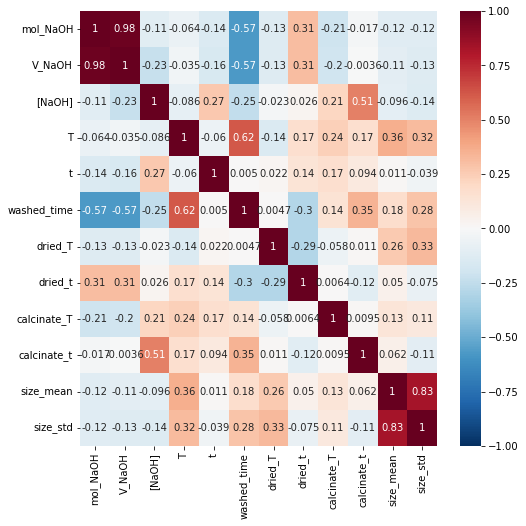

In [22]:
correlation = df.corr()
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Usar n_Naoh e n_TiO2 (Fração molar), [NaOH], V_NaOH se torna inutil porque a informação depende da pressão usada

morpho
Belt      AxesSubplot(0.125,0.125;0.775x0.755)
Rod       AxesSubplot(0.125,0.125;0.775x0.755)
Sphere    AxesSubplot(0.125,0.125;0.775x0.755)
Tube      AxesSubplot(0.125,0.125;0.775x0.755)
Wire      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

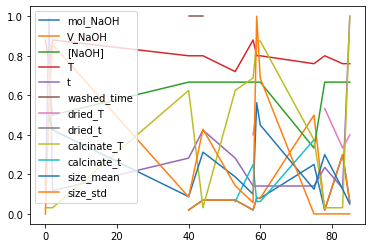

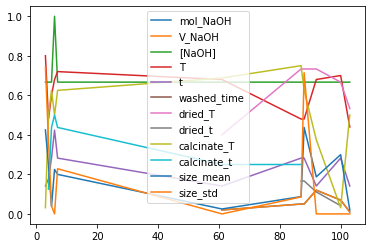

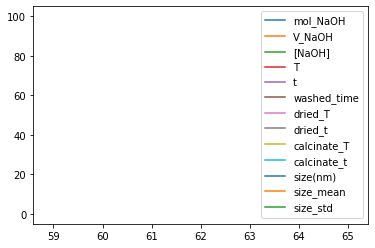

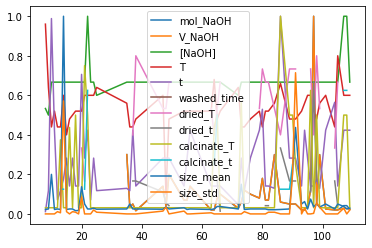

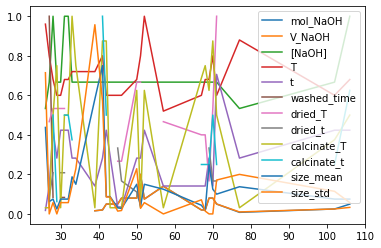

In [23]:
df.groupby(df['morpho']).plot()

In [24]:
import plotly.express as px

fig = px.line(df, x=df.index, y=['[NaOH]','V_NaOH','size_std'])
fig.show()


In [25]:
df.dtypes

prop_TiO2/NaOH     object
mol_NaOH          float64
V_NaOH            float64
[NaOH]            float64
T                 float64
t                 float64
what_washed        object
washed_time       float64
dried_T           float64
dried_t           float64
calcinate_T       float64
calcinate_t       float64
morpho             object
size(nm)           object
size_mean         float64
size_std          float64
dtype: object

# Para análise quantitativa: Tamanho

## Tratando Nulos

In [26]:
df.apply(pd.isnull).sum()/df.shape[0]

prop_TiO2/NaOH    0.000000
mol_NaOH          0.309091
V_NaOH            0.309091
[NaOH]            0.000000
T                 0.000000
t                 0.000000
what_washed       0.000000
washed_time       0.790909
dried_T           0.409091
dried_t           0.581818
calcinate_T       0.000000
calcinate_t       0.572727
morpho            0.000000
size(nm)          0.000000
size_mean         0.000000
size_std          0.000000
dtype: float64

usando apenas colunas sem nulos

In [27]:
#df2 = df[['[NaOH]','T','t','calcinate_T','size_mean']]
df2 = df[['[NaOH]','T','t','size_mean']] # sem os percentuais de titânio!
df2

,[NaOH],T,t,size_mean
0,0.666667,0.88,0.117647,0.15000
1,0.666667,0.76,0.988235,0.50000
2,0.500000,0.88,0.117647,0.42500
3,0.666667,0.80,0.141176,0.42500
4,0.666667,0.48,0.176471,0.25000
...,...,...,...,...
105,0.666667,0.80,0.141176,0.05000
106,1.000000,0.68,0.423529,0.07500
107,1.000000,0.60,0.423529,0.03750
108,1.000000,0.60,0.423529,0.02500


## Preparando modelo

In [28]:
import plotly.express as px

fig = px.bar(df, x=df.index, y='size_mean')
fig.show()

In [29]:

#x=pd.DataFrame(df2.iloc[:, 0:-1].values,columns=['[NaOH]','T','t','calcinate_T'])
x=df2.iloc[:, 0:-1].values

In [30]:

#y = pd.DataFrame(df2.iloc[:,-1].values,columns=['size_mean'])
y = df2.iloc[:,-1].values

In [31]:
from sklearn.model_selection import train_test_split #classe
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0) # objeto

In [32]:
print(x_test.shape,x_train.shape)

(22, 3) (88, 3)


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
#--------------------------------------------------
regressorRF = RandomForestRegressor(n_estimators = 11,random_state = 42) 
regressorRF.fit(x_train, y_train)
#---------------------------------------------------
regressorRi = Ridge(alpha=.1)
regressorRi.fit(x_train, y_train)

Ridge(alpha=0.1)

In [48]:
previsao1 = regressorRF.predict(x_test)
previsao2 = regressorRi.predict(x_test)

## Analisando **performance**

In [49]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, previsao1))
print(mean_squared_error(y_test, previsao2))

0.02195372527140343
0.025187449834725397


In [50]:
y_test

array([0.05   , 0.2    , 0.125  , 0.425  , 0.02875, 0.05   , 0.02875,
       0.2    , 0.025  , 0.4375 , 0.01875, 0.025  , 0.03125, 0.45   ,
       0.025  , 0.15   , 0.0225 , 0.15   , 0.0225 , 0.03125, 0.05   ,
       0.0225 ])

In [51]:
combined1 = np.concatenate((previsao1.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)

combined2 = np.concatenate((previsao2.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)
#combined.columns = ["actual", "predictions"]
compara1 = pd.DataFrame(combined1,columns=['pred','atual'])

compara2 = pd.DataFrame(combined2,columns=['pred','atual'])


<AxesSubplot:>

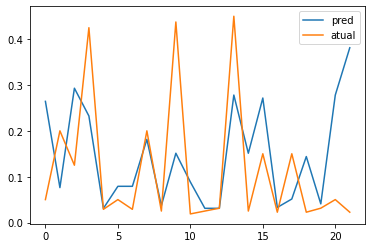

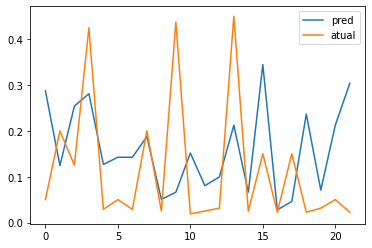

In [52]:
compara1.plot() #Random Forest
compara2.plot() #Ridge

In [53]:
import plotly.express as px

fig = px.line(compara1, x=compara1.index, y=['atual','pred'])
fig.show() 

## Testar:
  * Tirando temp calcinação
  * colocar proporção